In [67]:
#importing libraries we need 
import pandas as pd
import geopandas as gpd

In [68]:
#importing CalEnviroScreen 3.0 data
ces = pd.read_csv('Data/CES/ces3results.csv')
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
5508,6033000600,3957,Lake,95423,Clearlake Oaks,-122.575206,39.081678,17.06,30.53,30-35%,...,0.35,54.5,78.52,16.6,89.26,27.6,83.12,55.47,5.75,58.28


In [69]:
#adding zeros to census tract
ces = pd.read_csv(
        'Data/CES/ces3results.csv',
        dtype={
            'CensusTract':str
        }
)
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
1377,06107003200,6446,Tulare,93272,Tipton,-119.336888,36.056592,44.87,82.63,80-85%,...,95.08,79.2,98.06,12.4,72.43,10.3,13.59,65.44,6.79,73.24


In [70]:
#narrowing it down to LA county
ces = ces.query("CaliforniaCounty=='Los Angeles'")
ces.sample()

,CensusTract,TotalPopulation,CaliforniaCounty,ZIP,NearbyCity_(to help approximate location only),Longitude,Latitude,CES3.0_Score,CES3.0_pctl,CES3.0_pctl_range,...,LinguisticIsolation_pctl,Poverty,Poverty_pctl,Unemployment,Unemployment_pctl,HousingBurden,HousingBurden_pctl,PopChar,PopChar_Score,PopChar_pctl
472,06037434004,2796,Los Angeles,91733,South El Monte,-118.03219,34.04022,56.09,94.05,90-95%,...,86.72,61.3,85.57,5.0,12.69,5.9,2.63,60.87,6.31,66.46


In [71]:
#cleaning up data
ces = ces[['CensusTract','TotalPopulation','Longitude','Latitude','PM2.5','PM2.5_Pctl','Poverty']]
ces.columns = ['censustract','totalpop','lon','lat','pm25','pm25_pctl','poverty']
ces.sample()

,censustract,totalpop,lon,lat,pm25,pm25_pctl,poverty
1853,06037277400,1533,-118.374349,33.949035,12.05,81.66,46.7


In [72]:
#adding census data to get just LA city census tracts
race = gpd.read_file('Data/census/cr_race_tract.geojson')
race.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
137,14000US06037119700,"Census Tract 1197, Los Angeles, CA",5076.0,318.0,2639.0,346.0,1298.0,302.0,185.0,148.0,...,17.0,633.0,269.0,96.0,92.0,96.0,92.0,0.0,17.0,"MULTIPOLYGON (((-118.43290 34.22653, -118.4320..."


In [73]:
#adding zeros to census tracts
race = gpd.read_file(
        'Data/census/cr_race_tract.geojson',
        dtype={
            'geoid':str
        }
)
race.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
891,14000US06037271500,"Census Tract 2715, Los Angeles, CA",3192.0,166.0,2746.0,172.0,1987.0,173.0,170.0,167.0,...,12.0,24.0,36.0,16.0,20.0,12.0,19.0,4.0,7.0,"MULTIPOLYGON (((-118.44491 34.01994, -118.4448..."


In [74]:
#cleaning up the census tract
race['geoid'] = race['geoid'].str.replace('14000US','')
race.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
802,06037240402,"Census Tract 2404.02, Los Angeles, CA",4107.0,475.0,1564.0,435.0,19.0,22.0,1528.0,436.0,...,12.0,1084.0,504.0,116.0,121.0,41.0,38.0,75.0,116.0,"MULTIPOLYGON (((-118.29163 33.94303, -118.2916..."


In [75]:
#cleaning up data
race = race[['geoid','B03002003','B03002004','B03002005','B03002006','B03002007','B03002008','B03002009','B03002012']]
race.columns = ['censustract','white','black','ami','asian','nhpi','other','multiracial','latinx']
race.sample()

,censustract,white,black,ami,asian,nhpi,other,multiracial,latinx
839,06037264000,2803.0,0.0,0.0,59.0,0.0,0.0,94.0,181.0


In [76]:
#will get rid of the bottonw row
race.tail(5)

,censustract,white,black,ami,asian,nhpi,other,multiracial,latinx
1000,06037980026,8.0,10.0,0.0,0.0,0.0,0.0,6.0,13.0
1001,06037980028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,06037980031,399.0,222.0,12.0,40.0,10.0,11.0,56.0,363.0
1003,06037990200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,16000US0644000,1127314.0,340688.0,6091.0,455113.0,5754.0,14051.0,87757.0,1922889.0


In [77]:
#dropping the last row 
race=race.drop(1004)

In [78]:
#double checking the last row
race.tail()

,censustract,white,black,ami,asian,nhpi,other,multiracial,latinx
999,06037980024,160.0,17.0,11.0,12.0,0.0,0.0,0.0,64.0
1000,06037980026,8.0,10.0,0.0,0.0,0.0,0.0,6.0,13.0
1001,06037980028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,06037980031,399.0,222.0,12.0,40.0,10.0,11.0,56.0,363.0
1003,06037990200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#merging CES and census data
df = ces.merge(race,on="censustract")
df.sample()

,censustract,totalpop,lon,lat,pm25,pm25_pctl,poverty,white,black,ami,asian,nhpi,other,multiracial,latinx
513,06037217100,5374,-118.35453,34.048966,12.05,81.66,27.8,1453.0,1803.0,0.0,215.0,0.0,355.0,102.0,2398.0


In [80]:
#adding usc database to get neighborhood names
usc = pd.read_csv('Data/Censust_neighborhood.csv')
usc.sample()

,GEOID,Tract,CensusTract,Tract Number,Neighborhood,Location,Latitude,Longitude
325,1400000US06037139701,"Census Tract 1397.01, Los Angeles County, Cali...",6037139701,139701,Encino,"(34.157356, -118.4967075)",34.157356,-118.496707


In [81]:
#cleaning up the census tract
usc = pd.read_csv(
        'Data/Censust_neighborhood.csv',
        dtype={
            'CensusTract':str
        }
)
usc.sample()

,GEOID,Tract,CensusTract,Tract Number,Neighborhood,Location,Latitude,Longitude
1892,1400000US06037575001,"Census Tract 5750.01, Los Angeles County, Cali...",06037575001,575001,Long Beach,"(33.794735, -118.147801)",33.794735,-118.147801


In [82]:
#cleaning up the data
usc = usc[['CensusTract','Neighborhood']]
usc.columns = ['censustract','neighborhood']
usc.sample()

,censustract,neighborhood
203,06037124903,Valley Village


In [83]:
#merging USC and df datasets
air = usc.merge(df,on='censustract')
air.sample()

,censustract,neighborhood,totalpop,lon,lat,pm25,pm25_pctl,poverty,white,black,ami,asian,nhpi,other,multiracial,latinx
569,06037209510,Westlake,2692,-118.281958,34.052963,12.89,92.89,67.2,97.0,84.0,6.0,697.0,0.0,78.0,14.0,2028.0


In [84]:
#finding descriptive statistics of data
air.pm25.describe()

count    1002.000000
mean       11.884891
std         0.848565
min         8.697944
25%        11.210000
50%        12.050000
75%        12.890000
max        12.890000
Name: pm25, dtype: float64

In [85]:
#soring data from high PM to low PM  by neighbrohood
pm25_sorted1 = air.groupby('neighborhood', as_index=False)['pm25'].mean().sort_values(by='pm25',ascending=False)
pm25_sorted1.head()

,neighborhood,pm25
0,Adams-Normandie,12.89
21,Chinatown,12.89
119,Windsor Square,12.89
101,University Park,12.89
92,South Park,12.89


(0.0, 15.0)

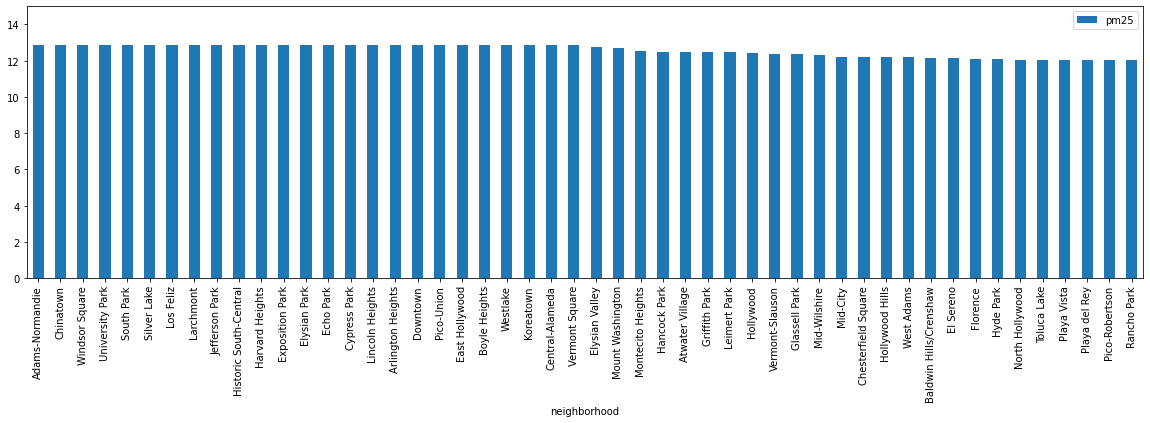

In [86]:
#plotting the above onto a bar graph
pm25_sorted1 = pm25_sorted1[:50].plot.bar(figsize=(20,5),x='neighborhood',y='pm25')
pm25_sorted1.set_ylim([0,15])

In [87]:
#soring data from low PM to high PM  by neighbrohood
pm25_sorted3 = air.groupby('neighborhood', as_index=False)['pm25'].mean().sort_values(by='pm25',ascending=True)
pm25_sorted3.head()

,neighborhood,pm25
100,Tujunga Canyons,8.697944
18,Chatsworth Reservoir,9.955483
17,Chatsworth,10.256950
113,West Hills,10.332317
57,Lake Balboa,10.370000


(0.0, 15.0)

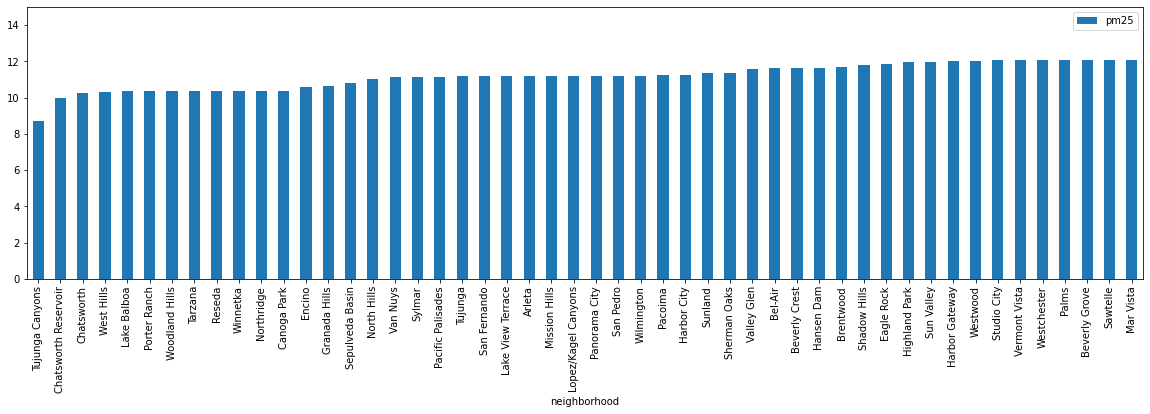

In [88]:
#plotting the above onto a bar graph
pm25_sorted3 = pm25_sorted3[:50].plot.bar(figsize=(20,5),x='neighborhood',y='pm25')
pm25_sorted3.set_ylim([0,15])

In [89]:
#importing more libraries to create better bar graphs
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sodapy import Socrata
import plotly.graph_objects as go

In [90]:
#sorting data again from high to low PM 
sort1 = air.groupby('neighborhood', as_index=False)['pm25'].mean().sort_values(by='pm25',ascending=False)
sort1.head()

,neighborhood,pm25
0,Adams-Normandie,12.89
21,Chinatown,12.89
119,Windsor Square,12.89
101,University Park,12.89
92,South Park,12.89


In [91]:
#plotting it onto a plotly bar graph
fig = px.bar(sort1,
       x='neighborhood',
       y='pm25',
       title='Top Neighborhoods with the Highest PM 2.5 levels in Los Angeles',
       labels={'neighborhood':'neighborhood','pm25':'PM 2.5'}
      )
fig.show()

In [92]:
#saving the above
fig.write_html("highpm.html")

In [93]:
#sorting data again from low to high PM 
sort2 = air.groupby('neighborhood', as_index=False)['pm25'].mean().sort_values(by='pm25',ascending=True)
sort2.head()

,neighborhood,pm25
100,Tujunga Canyons,8.697944
18,Chatsworth Reservoir,9.955483
17,Chatsworth,10.256950
113,West Hills,10.332317
57,Lake Balboa,10.370000


In [94]:
#plotting it onto a plotly bar graph
fig1= px.bar(sort3,
       x='neighborhood',
       y='pm25',
       title='Top Neighborhoods with the Lowest PM 2.5 levels in Los Angeles',
       labels={'neighborhood':'neighborhood','pm25':'PM 2.5'}
      )
fig1.show()

In [95]:
#saving the above
fig1.write_html("lowestpm.html")

In [96]:
#stats from high to low PM by neighborhood
air.groupby("neighborhood").pm25.describe().sort_values(by=["max"], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Adams-Normandie,5.0,12.890000,0.000000e+00,12.89,12.89,12.89,12.890,12.89
East Hollywood,18.0,12.890000,5.483568e-15,12.89,12.89,12.89,12.890,12.89
Elysian Park,2.0,12.890000,0.000000e+00,12.89,12.89,12.89,12.890,12.89
Elysian Valley,3.0,12.750000,2.424871e-01,12.47,12.68,12.89,12.890,12.89
Exposition Park,7.0,12.890000,0.000000e+00,12.89,12.89,12.89,12.890,12.89
Glassell Park,7.0,12.350000,3.174902e-01,12.05,12.05,12.47,12.470,12.89
Harvard Heights,6.0,12.890000,0.000000e+00,12.89,12.89,12.89,12.890,12.89
Historic South-Central,12.0,12.890000,0.000000e+00,12.89,12.89,12.89,12.890,12.89
Hollywood,22.0,12.412727,3.500909e-01,12.05,12.05,12.47,12.785,12.89


In [97]:
#stats from low to high PM by neighborhood
air.groupby("neighborhood").pm25.describe().sort_values(by=["max"], ascending=True).head(25)

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Tujunga Canyons,1.0,8.697944,NaN,8.697944,8.697944,8.697944,8.697944,8.697944
Chatsworth Reservoir,2.0,9.955483,0.000000e+00,9.955483,9.955483,9.955483,9.955483,9.955483
Woodland Hills,13.0,10.370000,1.848891e-15,10.370000,10.370000,10.370000,10.370000,10.370000
Tarzana,10.0,10.370000,1.872445e-15,10.370000,10.370000,10.370000,10.370000,10.370000
Chatsworth,11.0,10.256950,1.936208e-01,9.955483,10.162741,10.370000,10.370000,10.370000
West Hills,11.0,10.332317,1.249817e-01,9.955483,10.370000,10.370000,10.370000,10.370000
Canoga Park,13.0,10.370000,1.848891e-15,10.370000,10.370000,10.370000,10.370000,10.370000
Winnetka,11.0,10.370000,1.863059e-15,10.370000,10.370000,10.370000,10.370000,10.370000
Lake Balboa,7.0,10.370000,0.000000e+00,10.370000,10.370000,10.370000,10.370000,10.370000
